# Data Generation

In [21]:
import numpy as np #thư viện toán học mạnh mẽ về ma trận và mảng
import matplotlib.pyplot as plt #thư viện hỗ trợ vẽ đồ thị toán học

#Dữ liệu vào
n = 500
t = np.linspace(0,20.0*np.pi,n)
X = np.sin(t) 
#Tạo sóng sine từ 500 điểm, chu kỳ từ 0 đến 20pi

# Data Preparation

In [62]:
#Thiết lập số điểm (phần tử) cho mô hình LSTM
element = 10

#Chia nhỏ số điểm hình thành sóng sine để training mô hình chính xác hơn
last = int(n/5.0) # last = 500/5 = 100
Xtrain = X[:-last] #Lấy dữ liệu từ phần tử đầu (điểm đầu) đến phần tử kề cuối (điểm gần cuối)
Xtest = X[-last-element:]

#Lưu trữ giá trị các phần tử (element) dưới dạng chuỗi (mảng)
xin = []
next_X = []
#append dùng để thêm một phần tử vào cuối một list
for i in range (element,len(Xtrain)): #Cho i chạy từ 10 đến 100
    xin.append(Xtrain[i-element:i]) 
    #xin có 10 phần tử: Ban đầu chạy từ i chạy từ 0:10, sau đó 1:11, 2:12,...90:100
    next_X.append(Xtrain[i]) #Giá trị sẽ được thêm vào cuối sẽ là Xtrain[i]
    

#Reshape data to format for LSTM
xin, next_X = np.array(xin), np.array(next_X)
xin = xin.reshape(xin.shape[0], xin.shape[1], 1)
print(xin[0:5])

[[[0.        ]
  [0.12558307]
  [0.24917769]
  [0.36882689]
  [0.48263615]
  [0.58880346]
  [0.68564779]
  [0.77163571]
  [0.84540571]
  [0.90578975]]

 [[0.12558307]
  [0.24917769]
  [0.36882689]
  [0.48263615]
  [0.58880346]
  [0.68564779]
  [0.77163571]
  [0.84540571]
  [0.90578975]
  [0.9518317 ]]

 [[0.24917769]
  [0.36882689]
  [0.48263615]
  [0.58880346]
  [0.68564779]
  [0.77163571]
  [0.84540571]
  [0.90578975]
  [0.9518317 ]
  [0.98280255]]

 [[0.36882689]
  [0.48263615]
  [0.58880346]
  [0.68564779]
  [0.77163571]
  [0.84540571]
  [0.90578975]
  [0.9518317 ]
  [0.98280255]
  [0.99821192]]

 [[0.48263615]
  [0.58880346]
  [0.68564779]
  [0.77163571]
  [0.84540571]
  [0.90578975]
  [0.9518317 ]
  [0.98280255]
  [0.99821192]
  [0.99781582]]]


# LSTM Model Structure

In [63]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
#Các thư viện trên mục đích là để hỗ trợ xây dựng mô hình LSTM bằng cách lấy các tính năng về màu sắc,
#...dữ liệu,.. để xây dựng đồ thị 2D

#Initialize LSTM model
m = Sequential() #Khởi tạo models Sequential
m.add(LSTM(units = 50, return_sequences = True, \
          input_shape = (xin.shape[1],1))) #Sử dụng 50 unit để train
m.add(Dropout(0.2)) #Bỏ qua 0.2 unit để tránh trường hợp over-fitting
#Nếu không dropout. Khi chúng ta sử dụng full connected layer, các neural sẽ phụ thuộc “mạnh” 
#...lẫn nhau trong suốt quá trình huấn luyện, điều này làm giảm sức mạnh cho mỗi neural và 
#..dẫn đến bị over-fitting tập train.
m.add(LSTM(units = 50)) #Thêm mô hình LSTM khác cũng với 50 unit
m.add(Dropout(0.2))
m.add(Dense(units = 1)) #Thêm một lớp layer output với 1 unit
m.compile(optimizer = 'adam', loss = 'mean_squared_error') #Bắt đầu run chương trình hiển thị đồ thị



# LSTM Training

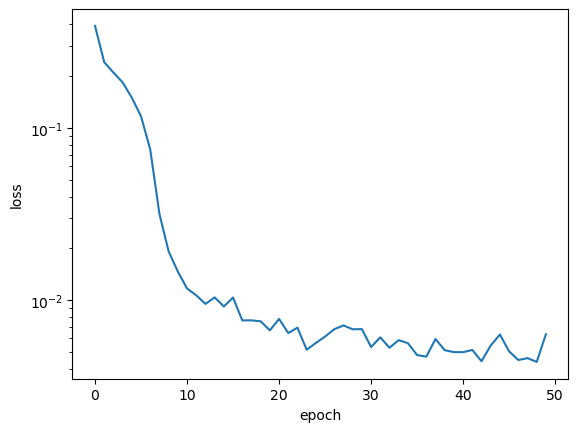

In [64]:
#Fit LSTM model
history = m.fit(xin, next_X, epochs = 50, batch_size = 50, verbose = 0) 
#Một epochs có 50 unit để train. Có tất cả 50 epochs
#...Batch_size nhỏ hơn epochs
#...batch_size là số dữ liệu được chia nhỏ ra để train trong 1 lần. 
#...Train khi nào số dữ liệu đó bằng epochs thì dừng
#...Khi ta chia nhỏ số lần để train thì đồng nghĩa việc sai số sẽ lớn hơn

#verbose = 0: Màn hình không hiển thị chú thích gì thêm

#verbose = 1: Chỉ hiển thị số lượng Epochs
plt.figure()
plt.ylabel('loss')
plt.xlabel('epoch')
plt.semilogy(history.history['loss'])





# Validation

4/4 [==============================] - 1s 6ms/step


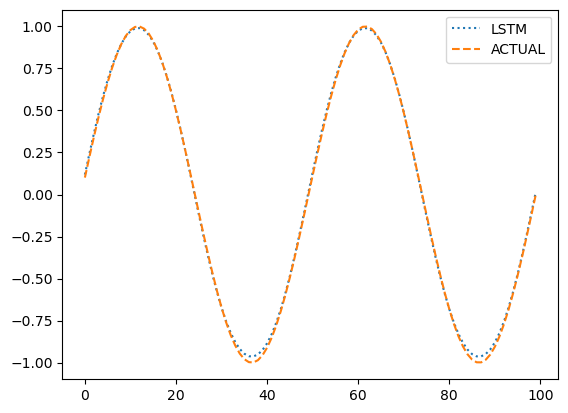

In [65]:

xin = []
next_X1 = []
for i in range(element,len(Xtest)):
    xin.append(Xtest[i-element:i])
    next_X1.append(Xtest[i])

#Reshape data to format for LSTM
xin, next_X1 = np.array(xin), np.array(next_X1)
xin = xin.reshape((xin.shape[0], xin.shape[1], 1))

#Dự đoán giá trị hiển thị tiếp theo 
X_pred = m.predict(xin)

#Plot prediction and actual for test data
plt.figure()
plt.plot(X_pred, ':', label = 'LSTM')
plt.plot(next_X1, '--', label = 'ACTUAL')
plt.legend()


# Forecast

1/1 [==============================] - 0s 37ms/step


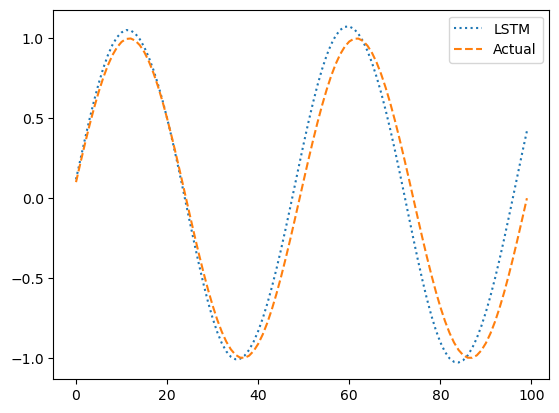

In [66]:
#Using predicted value to predict next step
X_pred = Xtest.copy()
for i in range (element, len(X_pred)):
    xin = X_pred[i-element:i].reshape((1,element,1))
    X_pred[i] = m.predict(xin)

#Plot prediction and actual for test data
plt.figure()
plt.plot(X_pred[element:], ':', label = 'LSTM')
plt.plot(next_X1, '--', label = 'Actual')
plt.legend()